# Hear begins our exploration of the data!!!

Hypothesis #1 There will be an interaction between personality combinations and particular drug consumption. 
Hypothesis #2 some personality and drug combinations will have stronger effects than others. 

In [109]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix


from imblearn.under_sampling import RandomUnderSampler



sns.set(style="whitegrid", color_codes=True)

In [110]:
# Load the Census dataset
drug_consumption_data = pd.read_csv("data/drug_consumption_project2.csv")


In [111]:
drug_consumption_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [112]:
# set data index
#data.set_index('ID', inplace = True)

In [113]:
drug_consumption_data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [114]:
drug_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [115]:
#check if any column or row contain a null value
drug_consumption_data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [116]:
drug_consumption_data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [117]:
#set up x and y variables

X_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
drugs = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'VSA']#, Removed 'Semer' as imbalanced data

In [118]:
# https://www.icpsr.umich.edu/web/ICPSR/studies/36536/variables

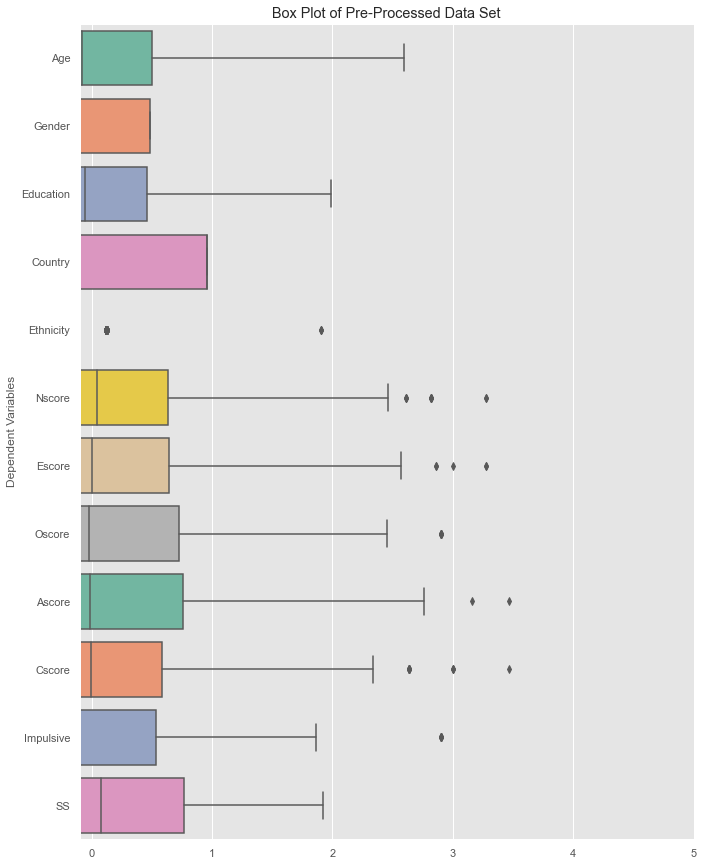

In [119]:
# Dependent variables distribution
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-.100, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = drug_consumption_data[X_features], 
  orient = 'h', 
  palette = 'Set2')

In [120]:
classes = {'Never_used': 'CL0', 
            'Used_over_a_decade_ago' :'CL1', 
            'Used_in_last_decade':'CL2', 
            'Used_in_last_year':'CL3', 
            'Used_in_last_month':'CL4',  
            'Used_in_last_week':'CL5',
            'Used_in_last_week':'CL6'}
classes

{'Never_used': 'CL0',
 'Used_over_a_decade_ago': 'CL1',
 'Used_in_last_decade': 'CL2',
 'Used_in_last_year': 'CL3',
 'Used_in_last_month': 'CL4',
 'Used_in_last_week': 'CL6'}

In [121]:

# Creating rough version of classification of drug consumption. Modifing my existing `data` object:
# 1 - if a person used a drug in month, week or day, then let's say that he did consume a drug.

# 0 - other categories are placed into the group that he did not consume a drug; 

def change(a):
    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') or (a == 'CL3')):
        a = 1
    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') ):
        a = 0
    return a



In [122]:
for drug in drugs:
    drug_consumption_data[drug]= drug_consumption_data[drug].map(change)
    

In [123]:
drug_consumption_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,CL0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,0,0,0,1,0,1,CL0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,CL0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,CL0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,CL0,0


In [124]:



X = drug_consumption_data[X_features]
y = drug_consumption_data['Ecstasy']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [126]:
# Modelling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
probs = logistic_regression.predict_proba(X_test)

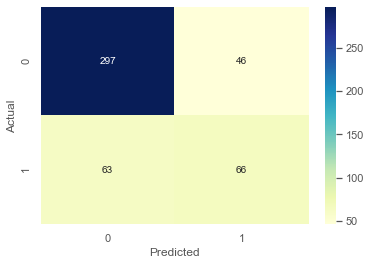

In [127]:
# Confusion matrix using pandas crosstab
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, cmap='YlGnBu', annot=True, fmt='d');

In [128]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7690677966101694


In [129]:
# Count number of unique values in every column
#data_nunique_dict = drug_consumption_data.nunique().to_dict()
#data_nunique_dict
drug_consumption_data.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         2
Amphet          2
Amyl            2
Benzos          2
Caff            2
Cannabis        2
Choc            2
Coke            2
Crack           2
Ecstasy         2
Heroin          2
Ketamine        2
Legalh          2
LSD             2
Meth            2
Shrooms         2
Nicotine        2
Semer           5
VSA             2
dtype: int64

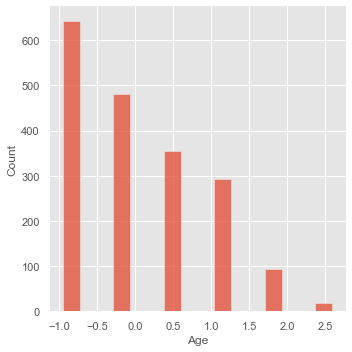

In [130]:
sns.displot(data = drug_consumption_data['Age'])

In [131]:
cols = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
cols_str = ' + '.join(x for x in cols)
 
smf.ols(formula='Ecstasy ~  Age + Gender', data=drug_consumption_data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ecstasy   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     210.8
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           2.48e-83
Time:                        15:26:53   Log-Likelihood:                -962.79
No. Observations:                1885   AIC:                             1932.
Df Residuals:                    1882   BIC:                             1948.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2808      0.009     30.181      0.000       0.263       0.299
Age           -0.1891      0.011    -17.754      0.000      -0.210      -0.168
Gender        -0.1608      0.019     -8.293      0.000      -0.199      -0.123
==============================================================================
Omnibus:                      248.394   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.613
Skew:                           0.662   Prob(JB):                     1.35e-40
Kurtosis:                       2.235   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:

X = drug_consumption_data[['Age', 'Gender']]
y = drug_consumption_data['Ecstasy']
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array([0, 0, 0, ..., 0, 0, 1])

In [133]:
classes = {'Never_used': 'CL0', 
            'Used_over_a_decade_ago' :'CL1', 
            'Used_in_last_decade':'CL2', 
            'Used_in_last_year':'CL3', 
            'Used_in_last_month':'CL4',  
            'Used_in_last_week':'CL5'}
classes

{'Never_used': 'CL0',
 'Used_over_a_decade_ago': 'CL1',
 'Used_in_last_decade': 'CL2',
 'Used_in_last_year': 'CL3',
 'Used_in_last_month': 'CL4',
 'Used_in_last_week': 'CL5'}

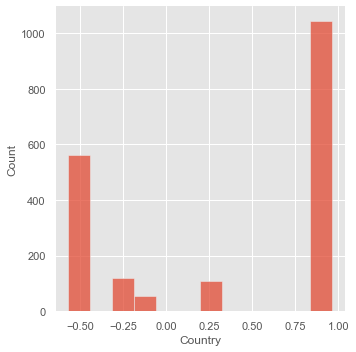

In [134]:
sns.displot(data = drug_consumption_data['Country'])

In [135]:
countries_count = dict(drug_consumption_data.groupby('Country')['ID'].count())
countries_count = dict(sorted(countries_count .items(), key=lambda item: item[1]))
countries_count

{-0.46841: 5,
 0.21128: 20,
 -0.09765: 54,
 0.24923: 87,
 -0.28519: 118,
 -0.57009: 557,
 0.96082: 1044}

In [136]:
countries = ['NewZealand',  'Canada',  'UnitedStates',  'Ireland',  'UnitedKingdom',  'Australia',  'Global']
countries

['NewZealand',
 'Canada',
 'UnitedStates',
 'Ireland',
 'UnitedKingdom',
 'Australia',
 'Global']

In [137]:
#exact age; 18-24 years (643; 34.1%), 25-34 years (481; 25.5%), 35-44 years (356; 18.9%), 45-54 years (294; 15.6%), 55-64 (93; 4.9%), and over 65 (18; 1%).

# Balancing (Resampling)

Drug : VSA 	 Class 0: 1790 	 Class 1: 95 	 Proportion: 18.84 	 : 1


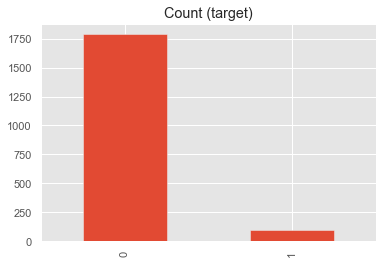

In [138]:
targets = drug_consumption_data['VSA']
target_count = targets.value_counts()
print('Drug :',drug,'\t','Class 0:', target_count[0], '\t','Class 1:', target_count[1],'\t',
        'Proportion:', round(target_count[0] / target_count[1], 2), '\t',': 1')
target_count.plot(kind='bar', title='Count (target)');

In [139]:
#!pip install imblearn

In [140]:

# Under Sampling
def random_under_resampler(X,y):
    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X, y)
    return X_rus , y_rus

In [141]:
#model splitt
def model_split(X_rus,y_rus):
    trainX, testX, trainy, testy = train_test_split(X_rus, y_rus, test_size=0.5, random_state=2)
    return testX, testy

Drug : VSA 	 Class 0: 95 	 Class 1: 95 	 Proportion: 1.0 	 : 1


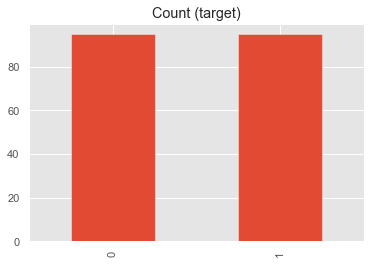

In [142]:
targets = y_rus
target_count = targets.value_counts()
print('Drug :',drug,'\t','Class 0:', target_count[0], '\t','Class 1:', target_count[1],'\t',
        'Proportion:', round(target_count[0] / target_count[1], 2), '\t',': 1')
target_count.plot(kind='bar', title='Count (target)');

In [143]:
# Evaluation:
# roc curve and auc
# calculate roc curve
def model_evaluation(testX,testy):
    #trainX, testX, trainy, testy = train_test_split(X_rus, y_rus, test_size=0.5, random_state=2)
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]
    # fit a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(trainX, trainy)
    # predict probabilities
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return testX, testy

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.775


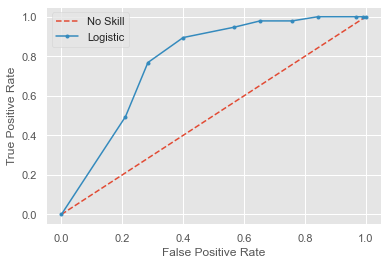

(         Age   Gender
 0   -0.95197  0.48246
 1   -0.95197  0.48246
 2   -0.07854  0.48246
 3   -0.07854  0.48246
 4    1.09449  0.48246
 ..       ...      ...
 185 -0.95197  0.48246
 186 -0.95197 -0.48246
 187 -0.95197 -0.48246
 188 -0.95197 -0.48246
 189 -0.95197  0.48246
 
 [190 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 185    1
 186    1
 187    1
 188    1
 189    1
 Name: VSA, Length: 190, dtype: int64)

In [144]:
model_evaluation(X_rus,y_rus)

In [145]:
# Confusion matrix using pandas crosstab

def confusionMatrix (testy, testX):
    model = LogisticRegression(solver='lbfgs')
    model.fit(testX, testy) 
    confusion_matrix = pd.crosstab(testy, model.predict(testX), rownames=['Actual'], colnames=['Predicted'])
    #sns.heatmap(confusion_matrix, cmap='YlGnBu', annot=True, fmt='d');
    plt.matshow(confusion_matrix)
    

Drug : Alcohol
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.615


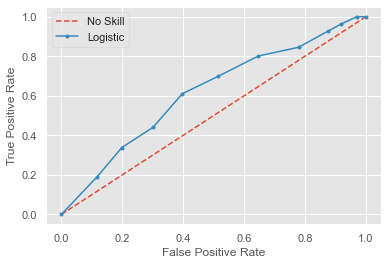

Drug : Amphet
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.737


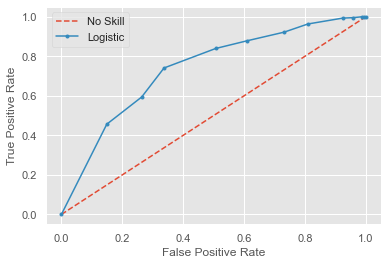

Drug : Amyl
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.694


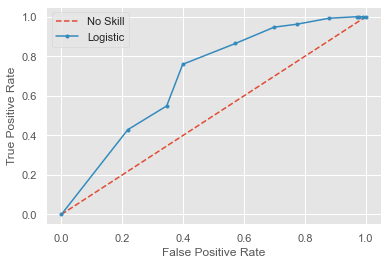

Drug : Benzos
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.641


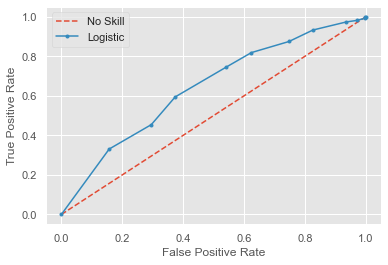

Drug : Caff
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.589


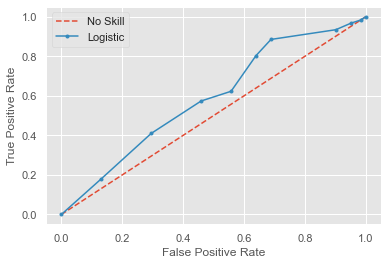

Drug : Cannabis
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.787


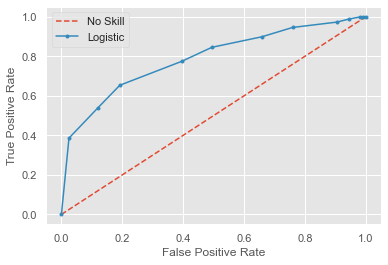

Drug : Choc
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.492


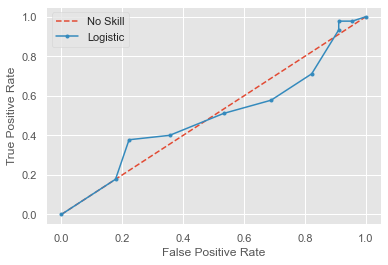

Drug : Coke
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.687


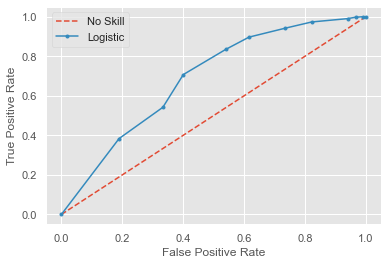

Drug : Crack
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.633


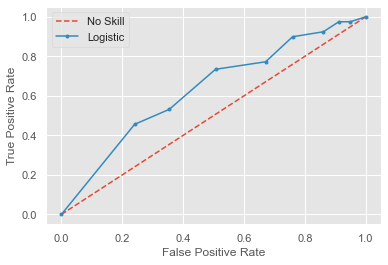

Drug : Ecstasy
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.778


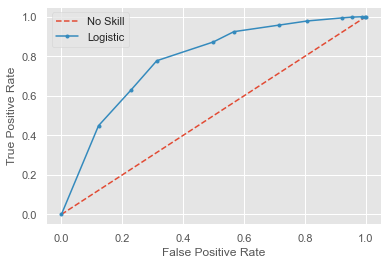

Drug : Heroin
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.708


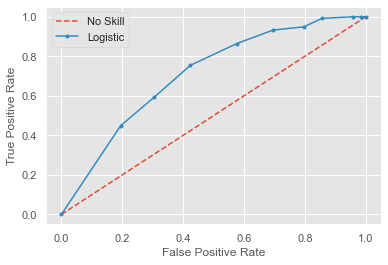

Drug : Ketamine
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.739


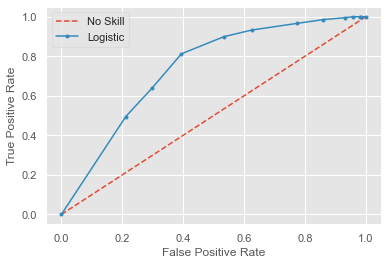

Drug : Legalh
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.773


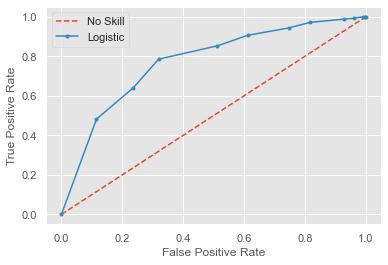

Drug : LSD
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.837


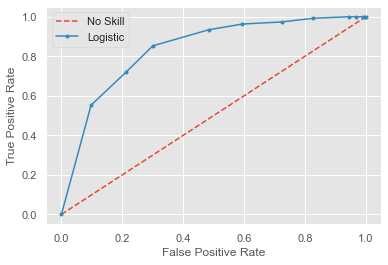

Drug : Meth
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.677


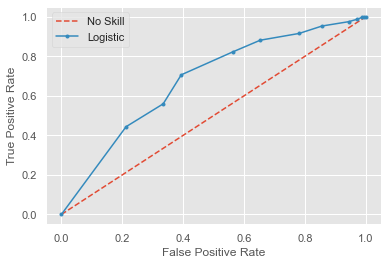

Drug : Shrooms
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774


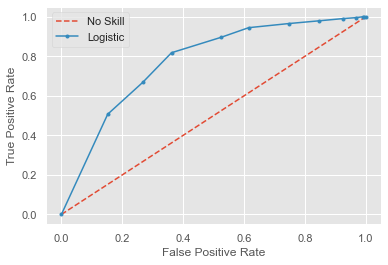

Drug : Nicotine
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.696


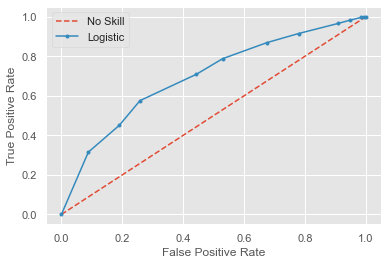

Drug : VSA
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


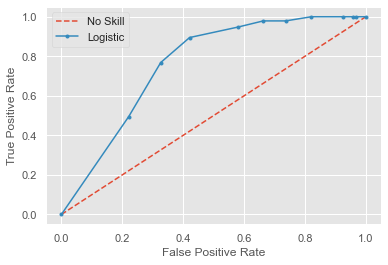

In [146]:
for drug in drugs:
    print('Drug :',drug)
    y = drug_consumption_data[drug]
    X_rus, y_rus = random_under_resampler(X,y)
    testX, testy = model_split(X_rus, y_rus)
    model_evaluation(X_rus,y_rus)



Drug : Alcohol
[[41 24]
 [21 50]]
accuracy : 0.6691176470588235



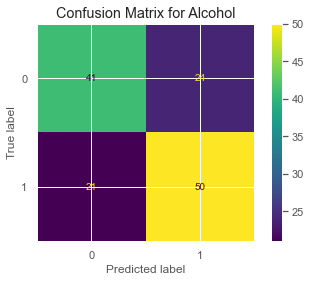

Drug : Amphet
[[135  81]
 [ 68 152]]
accuracy : 0.658256880733945



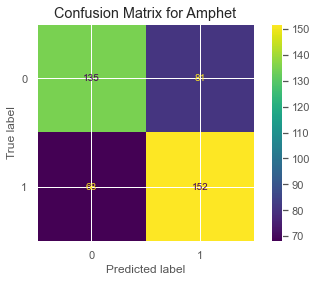

Drug : Amyl
[[43 21]
 [26 43]]
accuracy : 0.6466165413533834



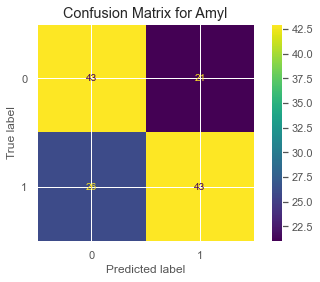

Drug : Benzos
[[164 103]
 [117 151]]
accuracy : 0.5887850467289719



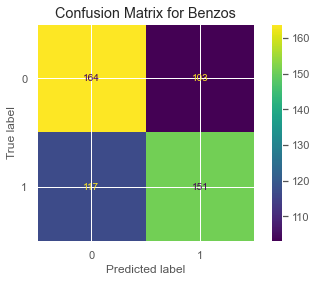

Drug : Caff
[[17 17]
 [ 9 18]]
accuracy : 0.5737704918032787



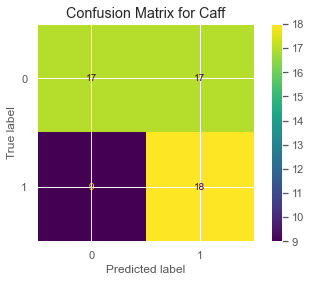

Drug : Cannabis
[[302 137]
 [123 324]]
accuracy : 0.7065462753950339



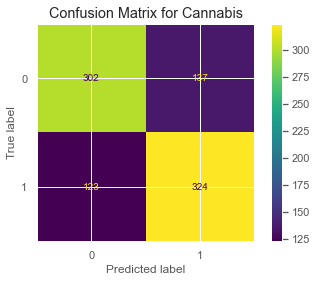

Drug : Choc
[[16  9]
 [ 6 14]]
accuracy : 0.6666666666666666



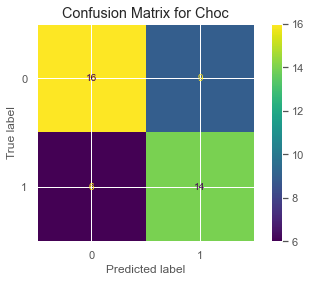

Drug : Coke
[[125  85]
 [ 66 141]]
accuracy : 0.6378896882494005



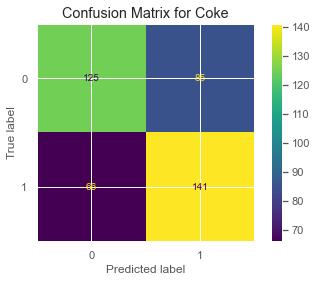

Drug : Crack
[[23 14]
 [ 8 34]]
accuracy : 0.7215189873417721



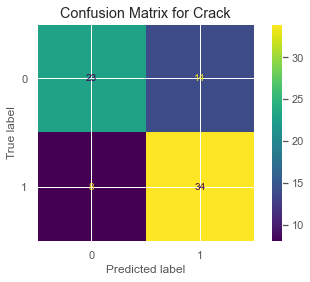

Drug : Ecstasy
[[180  79]
 [ 51 207]]
accuracy : 0.7485493230174082



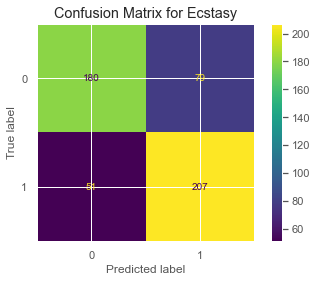

Drug : Heroin
[[30 22]
 [19 47]]
accuracy : 0.652542372881356



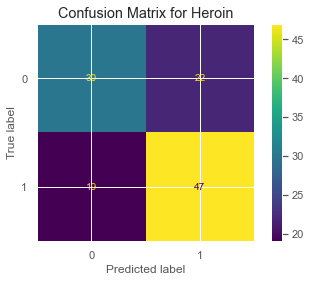

Drug : Ketamine
[[68 38]
 [19 83]]
accuracy : 0.7259615384615384



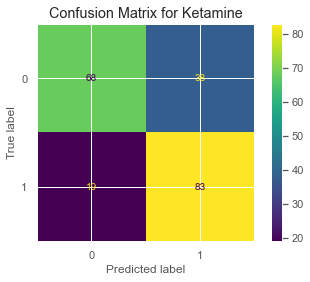

Drug : Legalh
[[212  71]
 [ 56 225]]
accuracy : 0.774822695035461



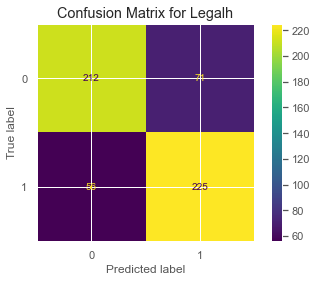

Drug : LSD
[[128  65]
 [ 27 160]]
accuracy : 0.7578947368421053



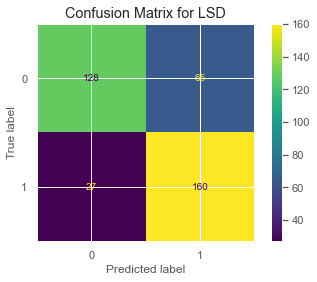

Drug : Meth
[[ 90  78]
 [ 48 104]]
accuracy : 0.60625



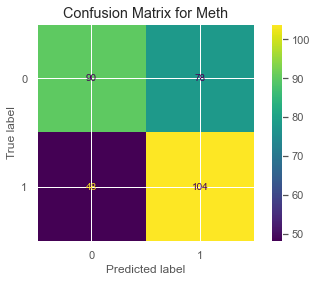

Drug : Shrooms
[[149  67]
 [ 36 182]]
accuracy : 0.7626728110599078



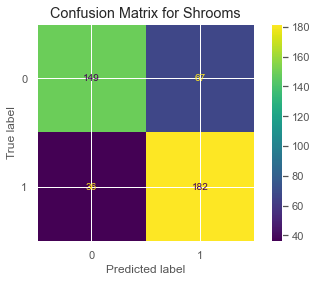

Drug : Nicotine
[[303 113]
 [160 249]]
accuracy : 0.6690909090909091



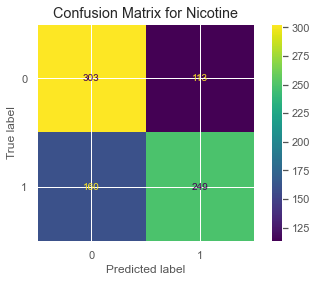

Drug : VSA
[[35  9]
 [10 41]]
accuracy : 0.8



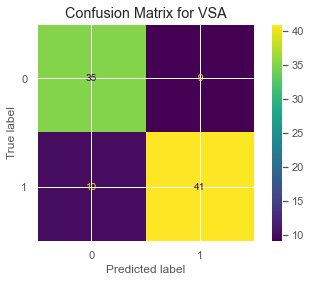

In [147]:
accuracy_dict = {}
for drug in drugs:
    y = drug_consumption_data[drug]
    X_rus, y_rus = random_under_resampler(X,y)
    testX, testy = model_split(X_rus,y_rus)
    #for drug in drugs:
    disp = plot_confusion_matrix(logistic_regression.fit(X_rus, y_rus),testX,testy)
    disp.ax_.set_title(f'Confusion Matrix for {drug}')
    accuracy = metrics.accuracy_score(testy, logistic_regression.predict(testX))
    accuracy_dict[drug]= accuracy
    print('Drug :',drug)
    print(disp.confusion_matrix)
    print('accuracy :',accuracy)
    print()

    plt.show()
#print(accuracy_dict)  

In [148]:
print(accuracy_dict)

{'Alcohol': 0.6691176470588235, 'Amphet': 0.658256880733945, 'Amyl': 0.6466165413533834, 'Benzos': 0.5887850467289719, 'Caff': 0.5737704918032787, 'Cannabis': 0.7065462753950339, 'Choc': 0.6666666666666666, 'Coke': 0.6378896882494005, 'Crack': 0.7215189873417721, 'Ecstasy': 0.7485493230174082, 'Heroin': 0.652542372881356, 'Ketamine': 0.7259615384615384, 'Legalh': 0.774822695035461, 'LSD': 0.7578947368421053, 'Meth': 0.60625, 'Shrooms': 0.7626728110599078, 'Nicotine': 0.6690909090909091, 'VSA': 0.8}
